Today we want to use a classification dataset that is related to a happiness of a person, this dataset is collected from here:https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset, and we want to use different classification methods on it

# Data Extraction

First of all we need to import the libraries we need for computing and preprocessing as well as plotting the data and the results we get from the algorithm we use

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

now we import our data and make it a pandas Dataframe to be able to use it

In [131]:
df = pd.read_csv('happydata.csv')
df = pd.DataFrame(df)
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


we change the column names that are hard to use

In [132]:
df.rename(columns={'happy':'label',
                   'ëvents':'events'}, inplace=True)

now we want to see if our dataset has a NaN value, whenever we have Nan values we have to handle them, but in this dataset, there is no NaN values as you can see

In [133]:
df.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
events           0
label            0
dtype: int64

we describe the dataset to be able to see some of the calculation that can help us with preprocessing

In [134]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,label
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


then we make sure there is no duplicated data in our dataset to stop it from overfitting

In [135]:
df.drop_duplicates()
df

,infoavail,housecost,schoolquality,policetrust,streetquality,events,label
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


# Data Visuals:

now we import sns to make a pairplot
a pairplot can help us see how the data spreads

In [136]:
import seaborn as sns

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


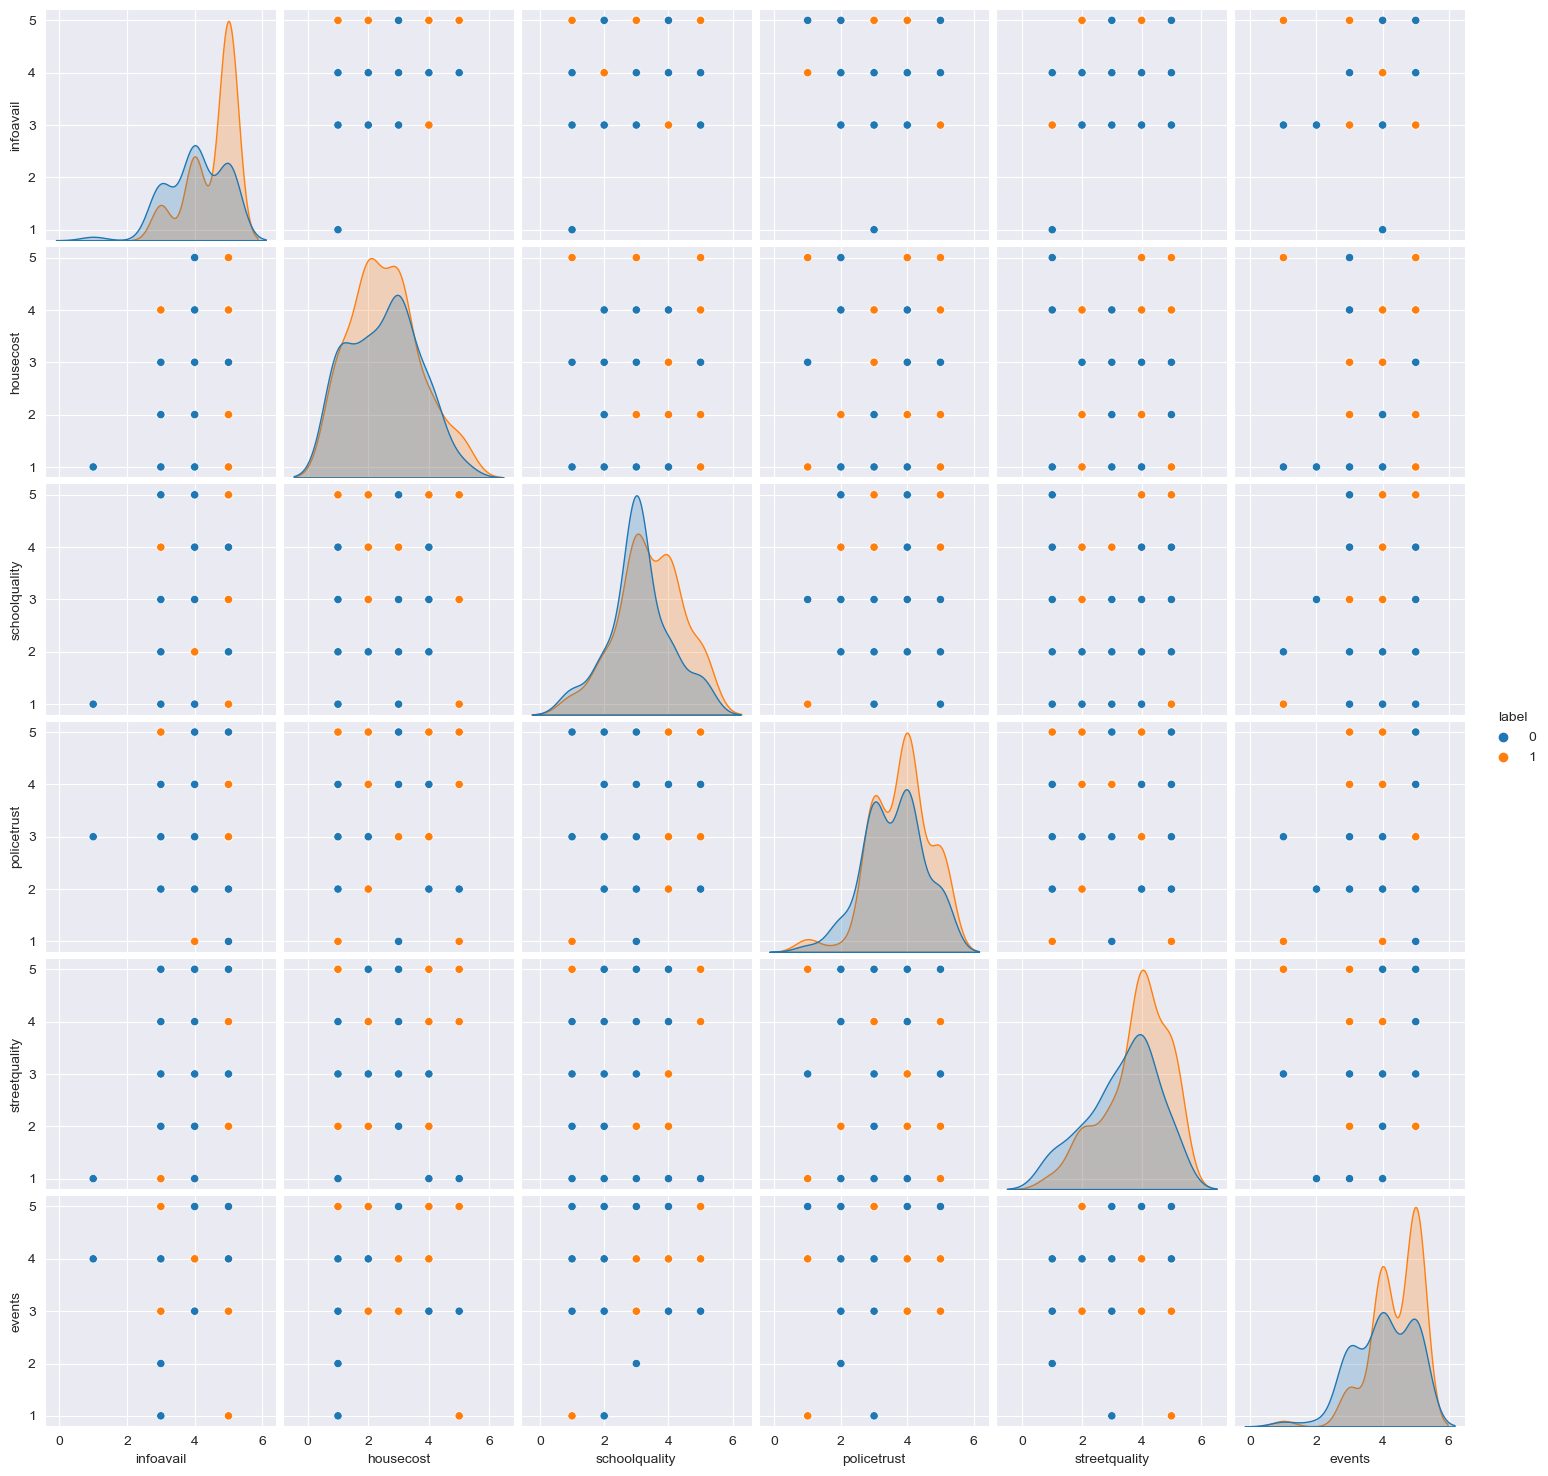

In [137]:
sns.pairplot(df, hue='label')
plt.show()

# Feature Corrolation

now we use DataFrames ability to get the corrolation matrix and then we use sns heatmap to visualize it, but as you can see they are not much and should not be considered to be deleted

In [138]:
corr = df.corr()

In [139]:
mask = np.triu(np.ones_like(corr, dtype=bool))

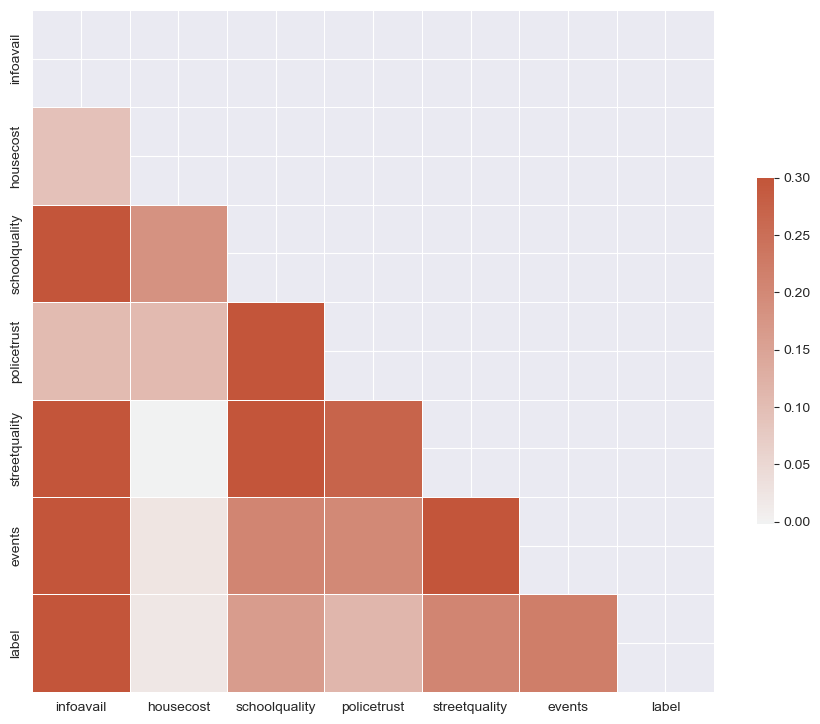

In [140]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Feature Distribution

now we plot the distribution of each feature, sometimes these plots can help us better understand our datasets

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


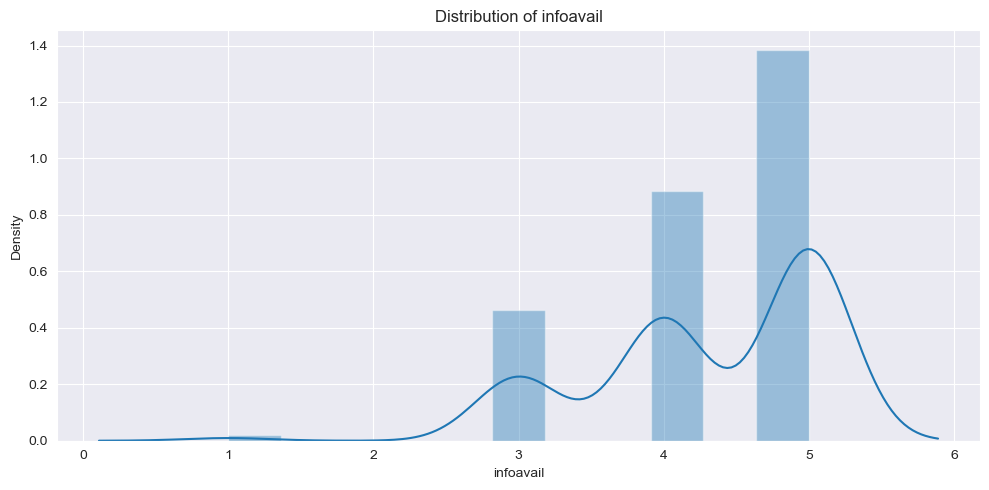

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


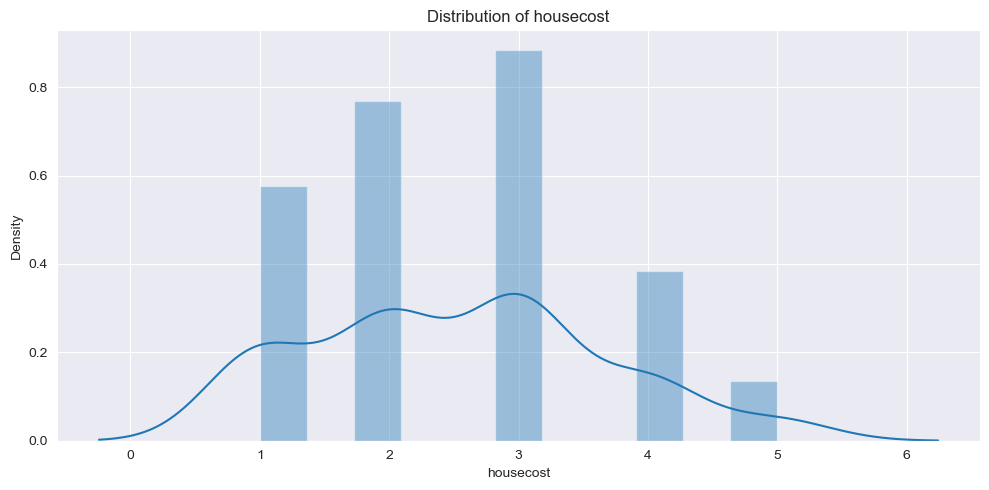

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


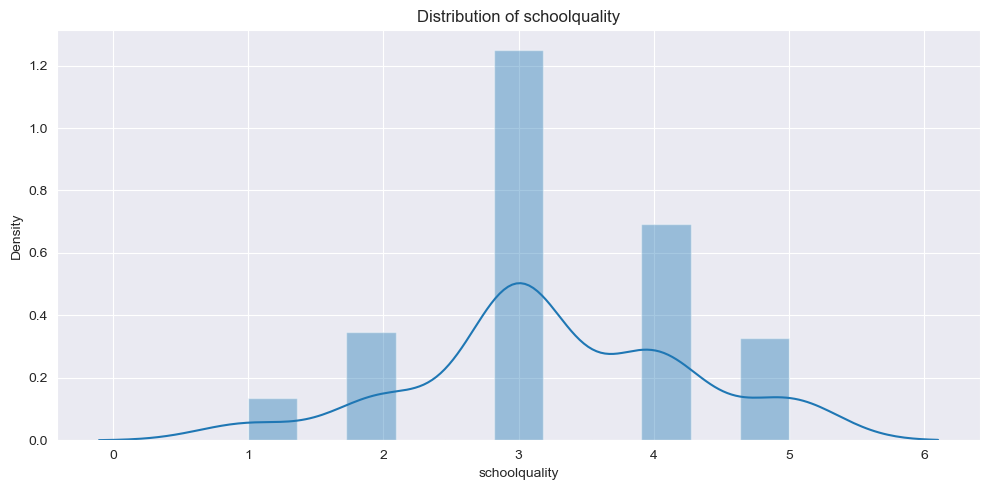

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


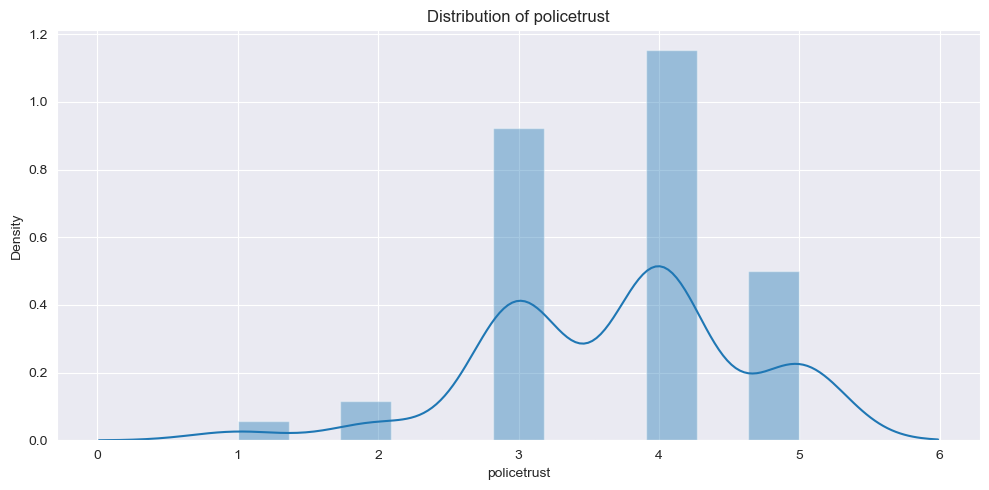

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


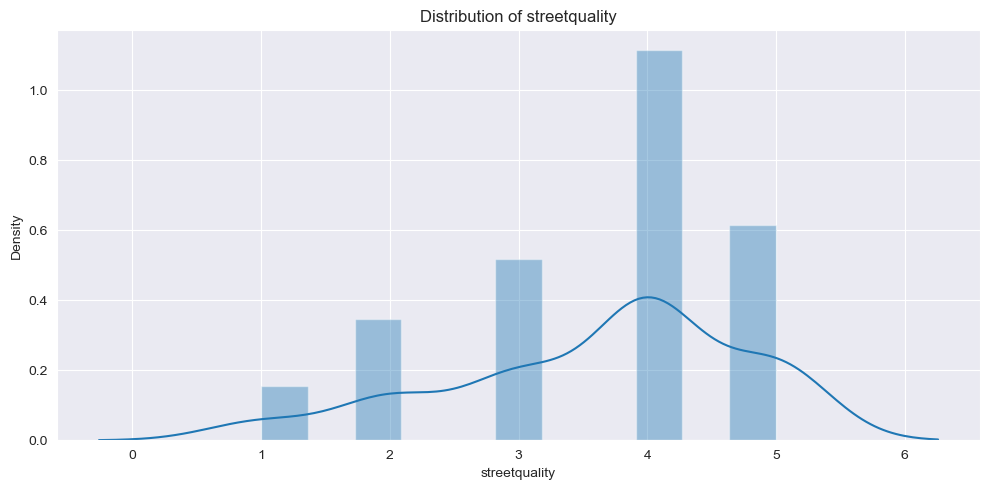

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


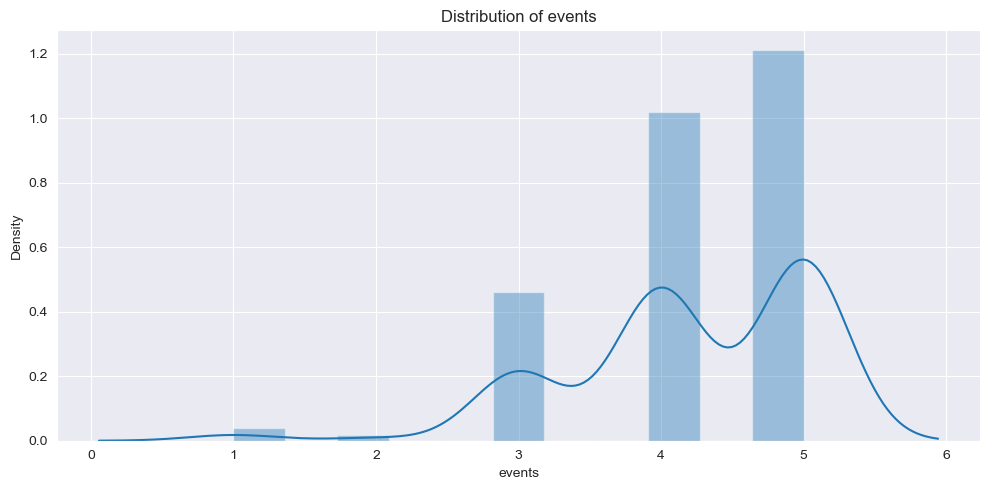

C:\Users\Lapfix.ir\AppData\Local\Temp\ipykernel_20112\2321429442.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


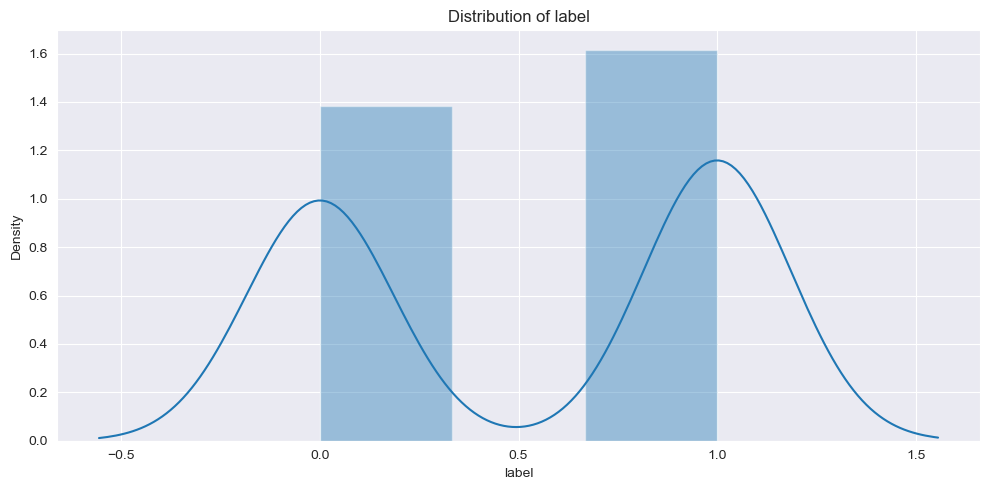

In [141]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

we do a box plot for each to see the outliers as well

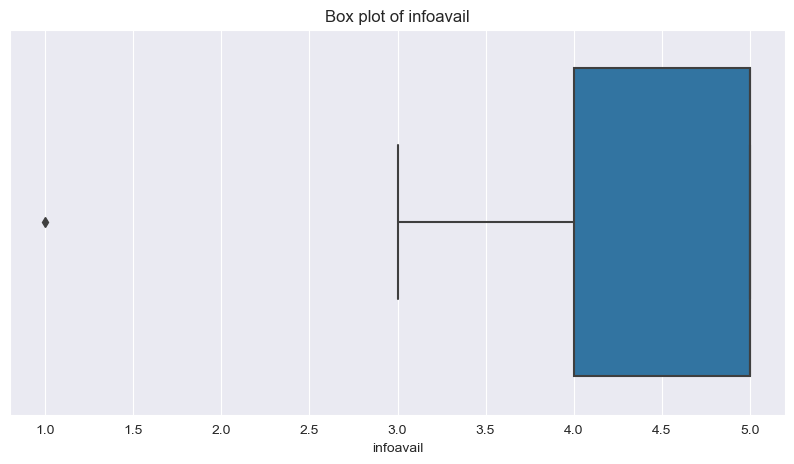

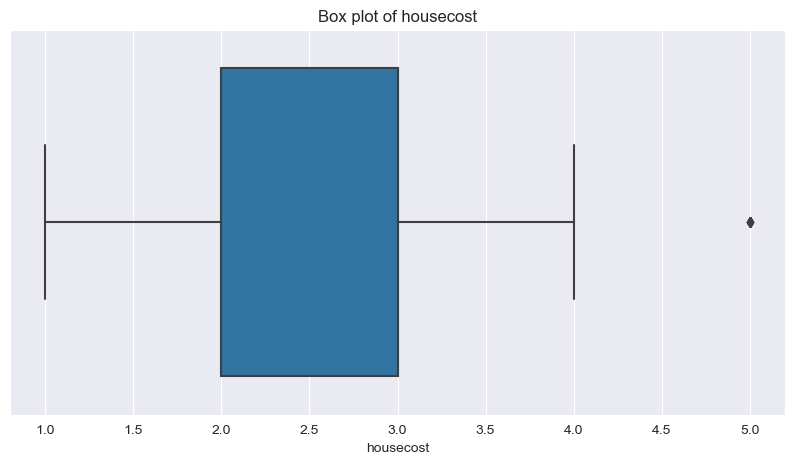

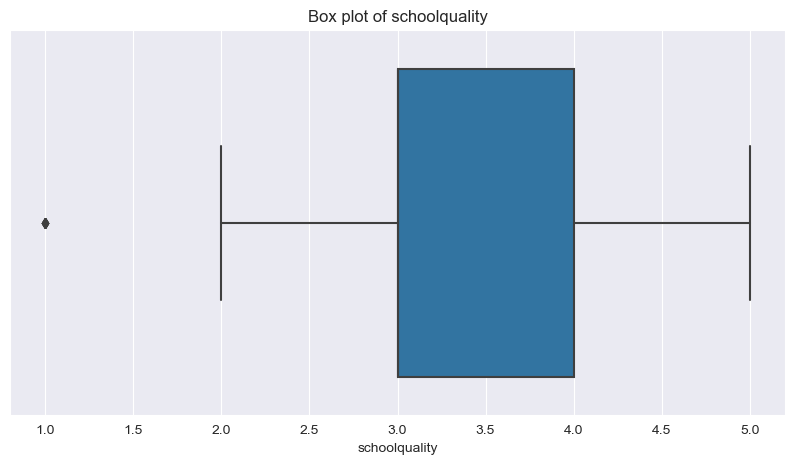

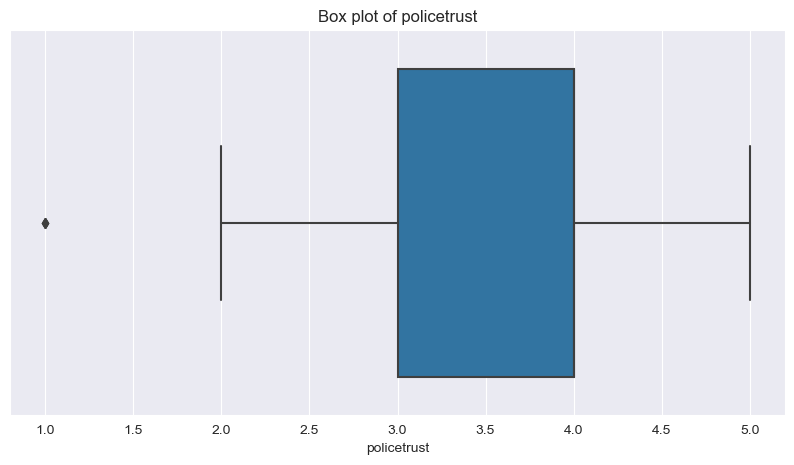

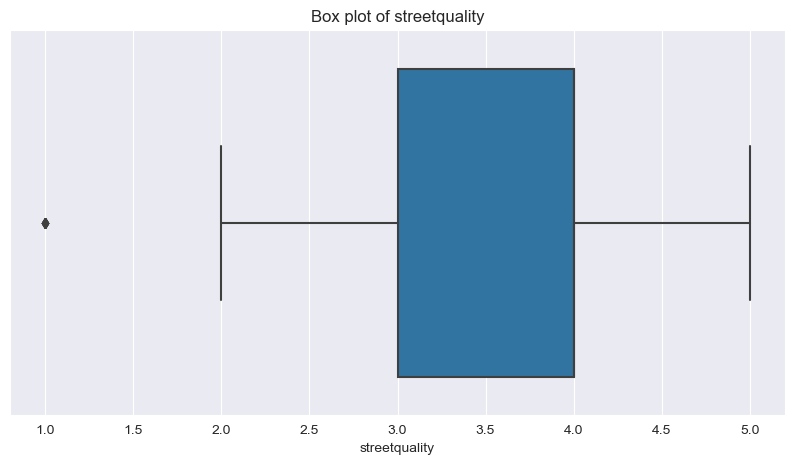

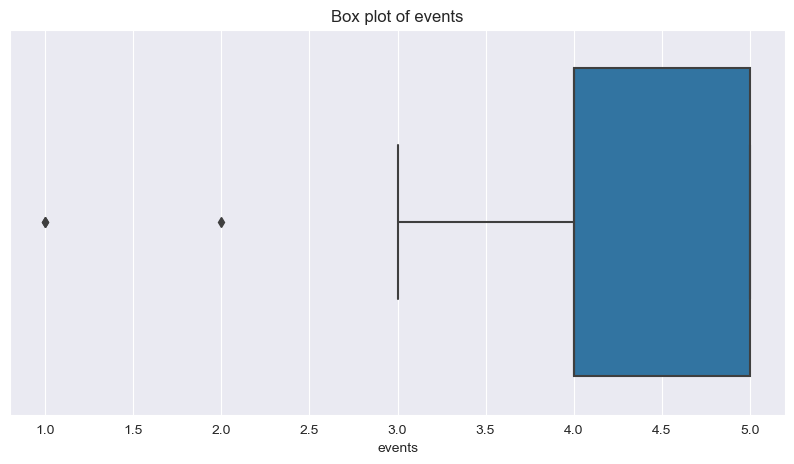

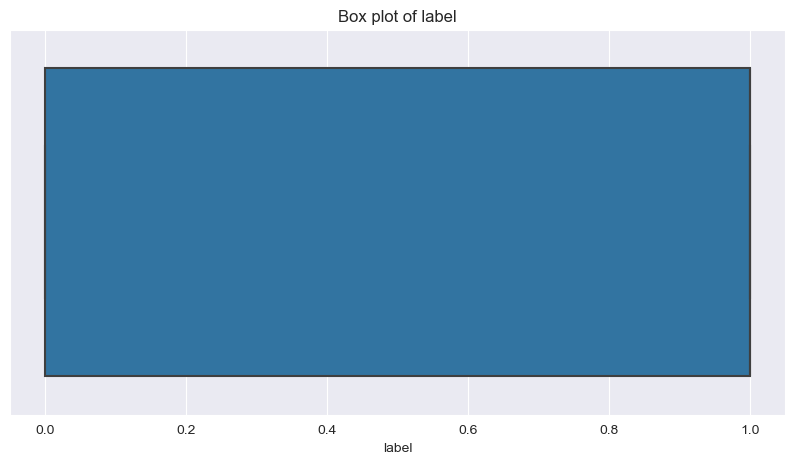

In [142]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Preprocessing

we use zscore from scipy to be able to detect and delete outliers so our model works better

In [143]:
from scipy.stats import zscore

In [144]:
z_scores = np.abs(zscore(df))
threshold = 3
outliers = np.where(z_scores > threshold)

In [145]:
print(f"Outlier rows: {outliers[0]}")

Outlier rows: [ 36  50 112 135 135 138]


In [146]:
outlier_rows = [36, 50, 112, 135, 135, 138]
df = df.drop(outlier_rows)
df = df.reset_index(drop=True)

now we store the features of our data as x and the label of our data as y

In [147]:
y = df.iloc[:,-1].astype(int)
x = df.iloc[:, :-1]

in this project we would use two different preprocessing methods to be able to find out which one is better here

In [148]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

we use these two scalers on the features and store them as x_m and x_x

The StandardScaler in preprocessing is a technique used to standardize the features of your dataset. Its a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g., Gaussian with 0 mean and unit variance).
Heres what it does:
Mean Removal: It helps to remove the mean from each feature so that its centered around zero.
Variance Scaling: It scales the features to unit variance.
This method is widely used for normalization in many machine learning algorithms. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [149]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

The MinMaxScaler is a preprocessing technique used in machine learning to normalize the data. Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Heres what it does:

Data Transformation: It transforms features by scaling each feature to a given range. This range can be set by specifying the feature_range parameter (default is (0, 1)).
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e., between zero and one.

The transformation is given by:

In [150]:
min_max_scaler = MinMaxScaler()
x_m= min_max_scaler.fit_transform(x)

because we need to see effects of preprocessing as well, we will split normal data with n at the end then the normalized data with s at the end and at last we split the minmax scaled data with the end of m

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x_train_n, x_test_n, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [153]:
x_train_s, x_test_s, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)

In [154]:
x_train_m, x_test_m, y_train, y_test = train_test_split(x_m, y, test_size=0.2, random_state=42)

# KNeighbors Classifier

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

at first we import the classifier and then the GridSearch for fine tuning

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

we first use the gridsearch to see which number for k works best

In [156]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

we make the decision based on accuracy

In [157]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [158]:
grid.fit(x_train_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

as you can see the best number for k in this dataset is 10, we will be using this in our method

In [159]:
print(grid.best_params_)

{'n_neighbors': 10}


now we make a variable for that to apply it to our datas

In [160]:
knn = KNeighborsClassifier(n_neighbors=10)

at first with the unchanged data we got the accuracy of 0.57

In [161]:
knn.fit(x_train_n, y_train)
y_pred_knn_n = knn.predict(x_test_n)
print('report for knn with original data:\n', classification_report(y_test, y_pred_knn_n))

report for knn with original data:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.50      0.58      0.54        12

    accuracy                           0.57        28
   macro avg       0.57      0.57      0.57        28
weighted avg       0.58      0.57      0.57        28


using the standard scaler data we got the accuracy of 0.50

In [162]:
knn.fit(x_train_s, y_train)
y_pred_knn_s = knn.predict(x_test_s)
print('report for knn with scaled data:\n', classification_report(y_test, y_pred_knn_s))

report for knn with scaled data:
               precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.45      0.75      0.56        12

    accuracy                           0.50        28
   macro avg       0.54      0.53      0.49        28
weighted avg       0.55      0.50      0.48        28


and for the mim max data we got the accuracy of 0.46

In [163]:
knn.fit(x_train_m, y_train)
y_pred_knn_m = knn.predict(x_test_m)
print('report for knn with min max data:\n', classification_report(y_test, y_pred_knn_m))

report for knn with min max data:
               precision    recall  f1-score   support

           0       0.57      0.25      0.35        16
           1       0.43      0.75      0.55        12

    accuracy                           0.46        28
   macro avg       0.50      0.50      0.45        28
weighted avg       0.51      0.46      0.43        28


it seems like for KNC we got the best accuracy with the original data, we use the predictions made by knn, k=10 on the original to get the plot down here

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


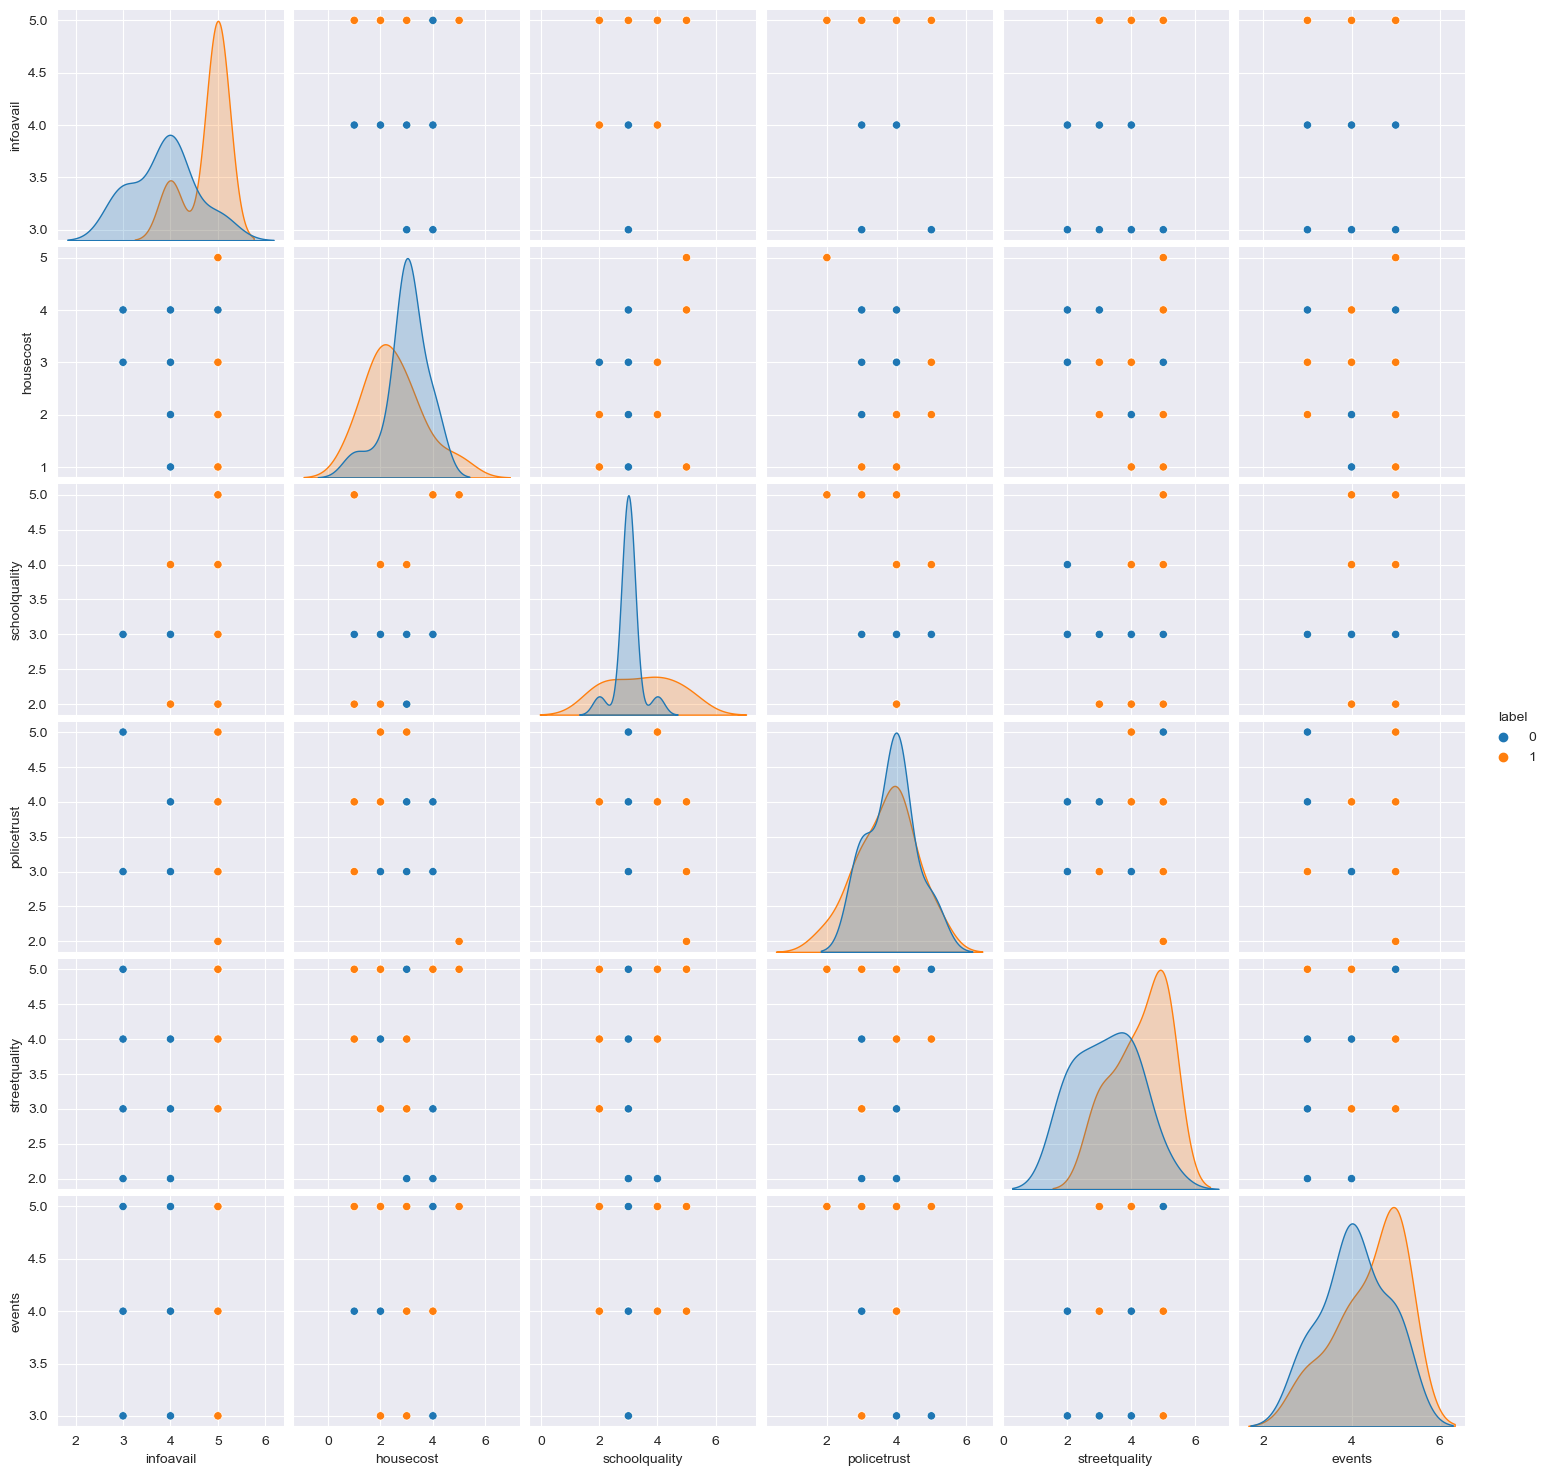

In [164]:
df_copy = pd.DataFrame(x_test_n)
df_copy['label'] = y_pred_knn_n

sns.pairplot(df_copy, hue='label')

# DecisionTree Classifier

Decision trees are presented similar to a flow chart, with a tree structure wherein instances are classified according to their feature values. A node in a decision tree represents an instance, outcomes of the test represented by branch, and the leaf node epitomized the class label.

first we import the classifier from sklearn.tree because this is a tree related method

In [165]:
from sklearn.tree import DecisionTreeClassifier

we start making a gridsearch to see which depth will work the best

In [166]:
dt = DecisionTreeClassifier()
param_grid = {'max_depth': np.arange(1, 21)}
grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

here we can see that the max depth is best to be 4 as shown by our gridsearch

In [167]:
grid.fit(x_train_s, y_train)
print(grid.best_params_)

{'max_depth': 1}


so now we make a variable with that to start training and prediction

In [168]:
dt = DecisionTreeClassifier(max_depth=4)

at first we use it on the unchanged data and get the accuracy of 0.39

In [169]:
dt.fit(x_train_n, y_train)
y_pred_dt_n = dt.predict(x_test_n)
print('report for Decision tree with original data:\n', classification_report(y_test, y_pred_dt_n))

report for Decision tree with original data:
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.35      0.50      0.41        12

    accuracy                           0.39        28
   macro avg       0.40      0.41      0.39        28
weighted avg       0.41      0.39      0.39        28


now with the standard scaled data we got the same amount for accuracy 0.39

In [170]:
dt.fit(x_train_s, y_train)
y_pred_dt_s = dt.predict(x_test_s)
print('report for Decision tree scaled data:\n', classification_report(y_test, y_pred_dt_s))

report for Decision tree scaled data:
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.35      0.50      0.41        12

    accuracy                           0.39        28
   macro avg       0.40      0.41      0.39        28
weighted avg       0.41      0.39      0.39        28


for the min max scaled data we got the same amount of accuracy as well 0.39

In [171]:
dt.fit(x_train_m, y_train)
y_pred_dt_m = dt.predict(x_test_m)
print('report for Decision tree with min max data:\n', classification_report(y_test, y_pred_dt_m))

report for Decision tree with min max data:
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.35      0.50      0.41        12

    accuracy                           0.39        28
   macro avg       0.40      0.41      0.39        28
weighted avg       0.41      0.39      0.39        28


as we can see all three got the of them get the same amount for accuracy, thats because this method is not effected by the changing of sclales

now we import plot tree to be able to see the tree that classified our dataset

In [172]:
from sklearn.tree import plot_tree

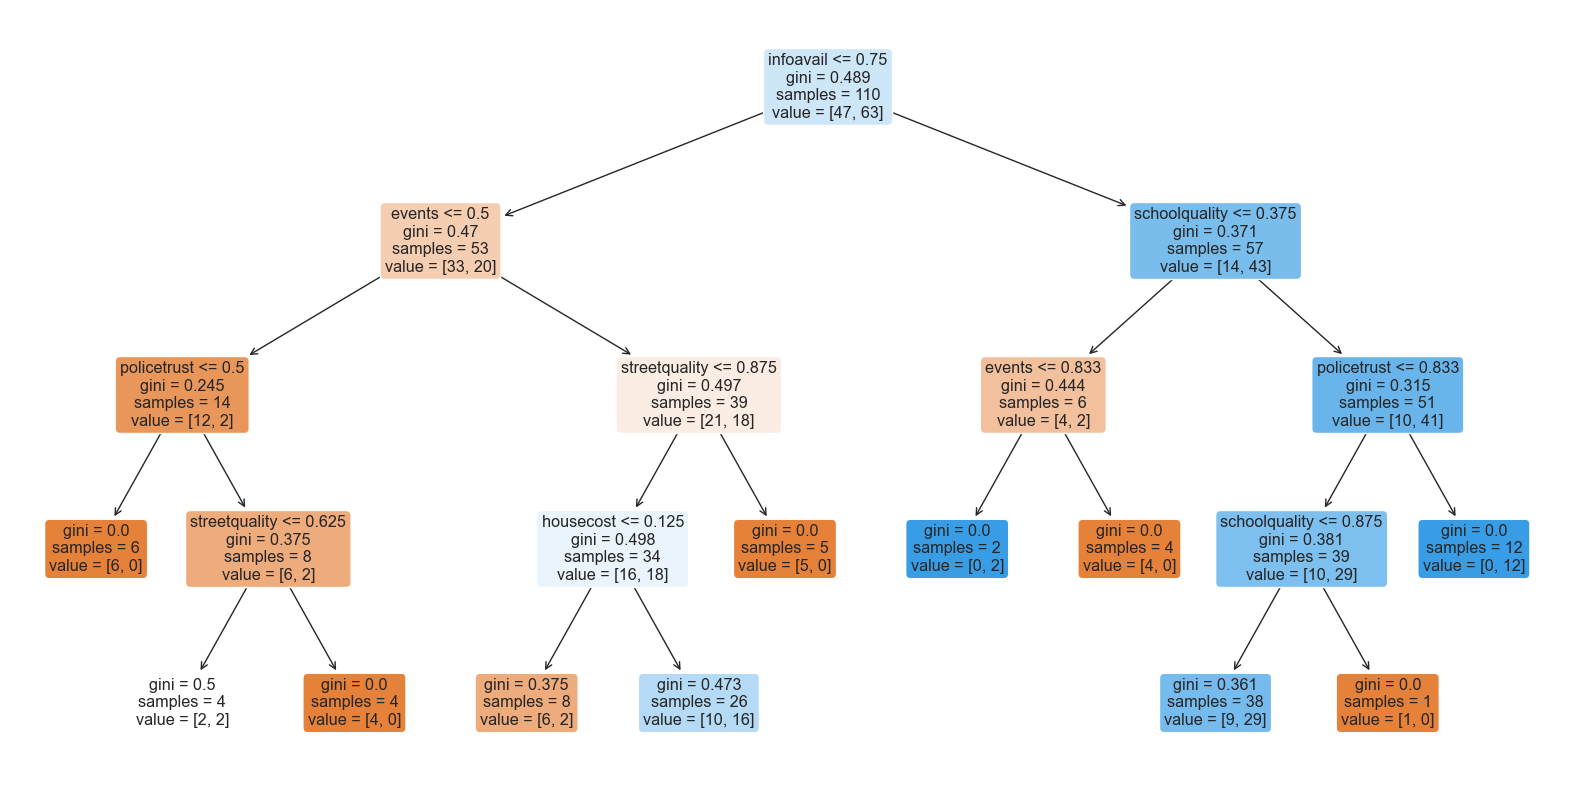

In [173]:
column_names = df.columns.tolist()

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, rounded=True, feature_names=column_names)
plt.show()

now we plot the data with the predicted data, as you can see this method didnt work very well but we learned something about decision tree classifier

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


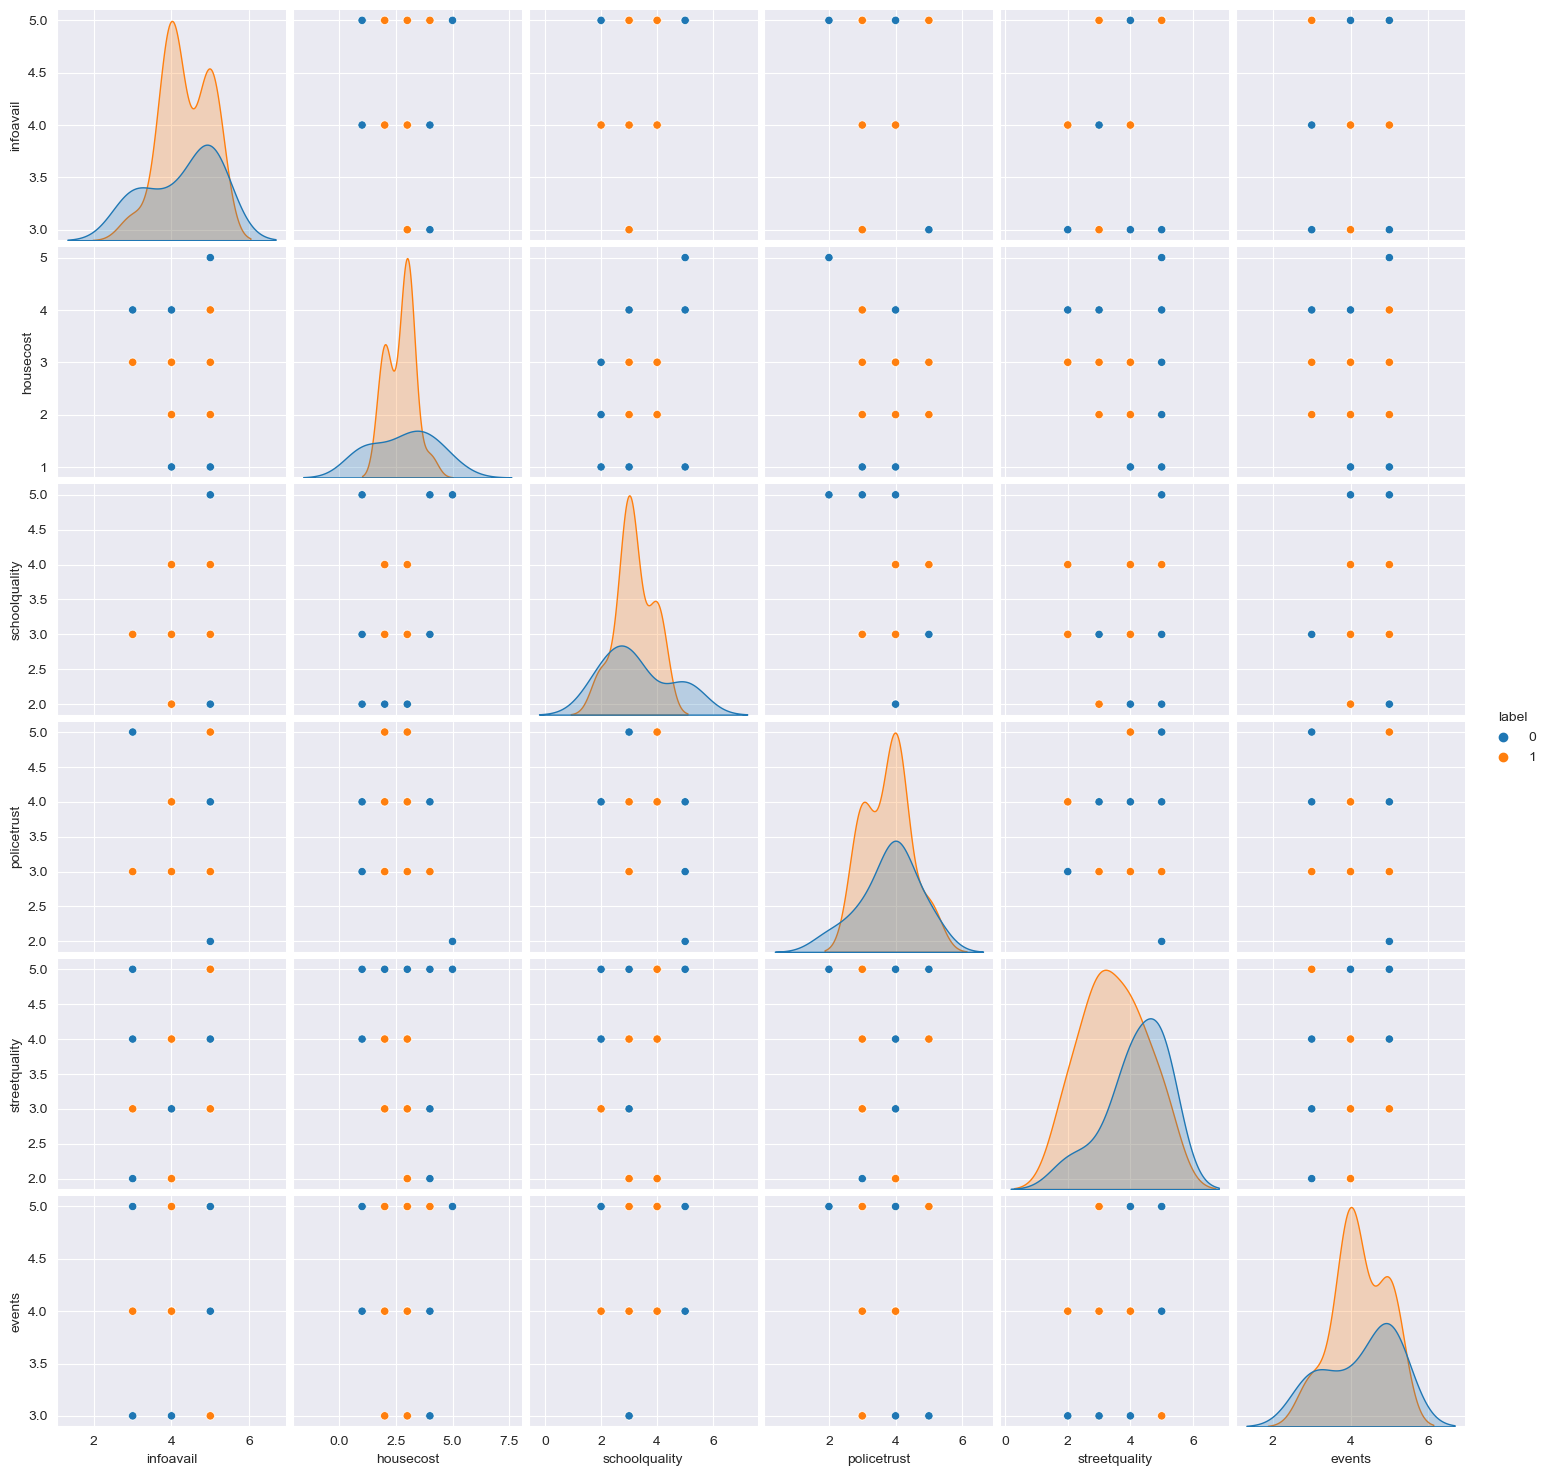

In [174]:
df_copy['label'] = y_pred_dt_n
sns.pairplot(df_copy, hue='label')

# Naive Bayes Classifier

now we get to another classifier called Naive Bayes

The Naive Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category.

this method is strangely simple so i made a function for it using ONLY numpy
This is the fit function of our Naive Bayes Model:

In [175]:
def fit(x, y):
    n_samples, n_features = x.shape
    classes = np.unique(y)
    n_classes = len(classes)

    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    prior = np.zeros(n_classes, dtype=np.float64)

    for i, c in enumerate(classes):
        x_c = x[y == c]
        mean[i, :] = np.mean(x_c, axis=0)
        var[i, :] = np.var(x_c, axis=0)
        prior[i] = x_c.shape[0] / float(n_samples)
    return mean, var, prior

and this is the predict function:

In [176]:
def predict(x, mean, var, prior):

    n_samples, n_features = x.shape
    n_classes = len(prior)
    log_posterior = np.zeros((n_samples, n_classes))

    for i in range(n_classes):

        log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var[i]) + ((x - mean[i]) ** 2) / var[i], axis=1)
        log_posterior[:, i] = log_likelihood + np.log(prior[i])

    return np.argmax(log_posterior, axis=1)

now we start fitting and predicting, we start by doing this on the original data, as you can see we got the accuracy of 0.57 which is as same as a more complex method like KNN

In [177]:
mean, var, prior = fit(x_train_n, y_train)
y_pred_nb_n = predict(x_test_n, mean, var, prior)
print('report for Naive Bayes with original data:\n', classification_report(y_test, y_pred_nb_n))

report for Naive Bayes with original data:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.50      0.67      0.57        12

    accuracy                           0.57        28
   macro avg       0.58      0.58      0.57        28
weighted avg       0.60      0.57      0.57        28


we do this on our standard scaled data and got the accuracy of 0.57 as well

In [178]:
mean, var, prior = fit(x_train_s, y_train)
y_pred_nb_s = predict(x_test_s, mean, var, prior)
print('report for Naive Bayes with scaled data:\n', classification_report(y_test, y_pred_nb_s))

report for Naive Bayes with scaled data:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.50      0.67      0.57        12

    accuracy                           0.57        28
   macro avg       0.58      0.58      0.57        28
weighted avg       0.60      0.57      0.57        28


now we use the min max data and again get the same amount for accuracy that is 0.57

In [179]:
mean, var, prior = fit(x_train_m, y_train)
y_pred_nb_m = predict(x_test_m, mean, var, prior)
print('report for Naive Bayes with scaled data:\n', classification_report(y_test, y_pred_nb_m))

report for Naive Bayes with scaled data:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.50      0.67      0.57        12

    accuracy                           0.57        28
   macro avg       0.58      0.58      0.57        28
weighted avg       0.60      0.57      0.57        28


eventhough a very simple method, it works as good as KNN here so we can surely say it is a plausable method and even can be the best, because unlike KNN the answer was consistent

now we plot the results

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


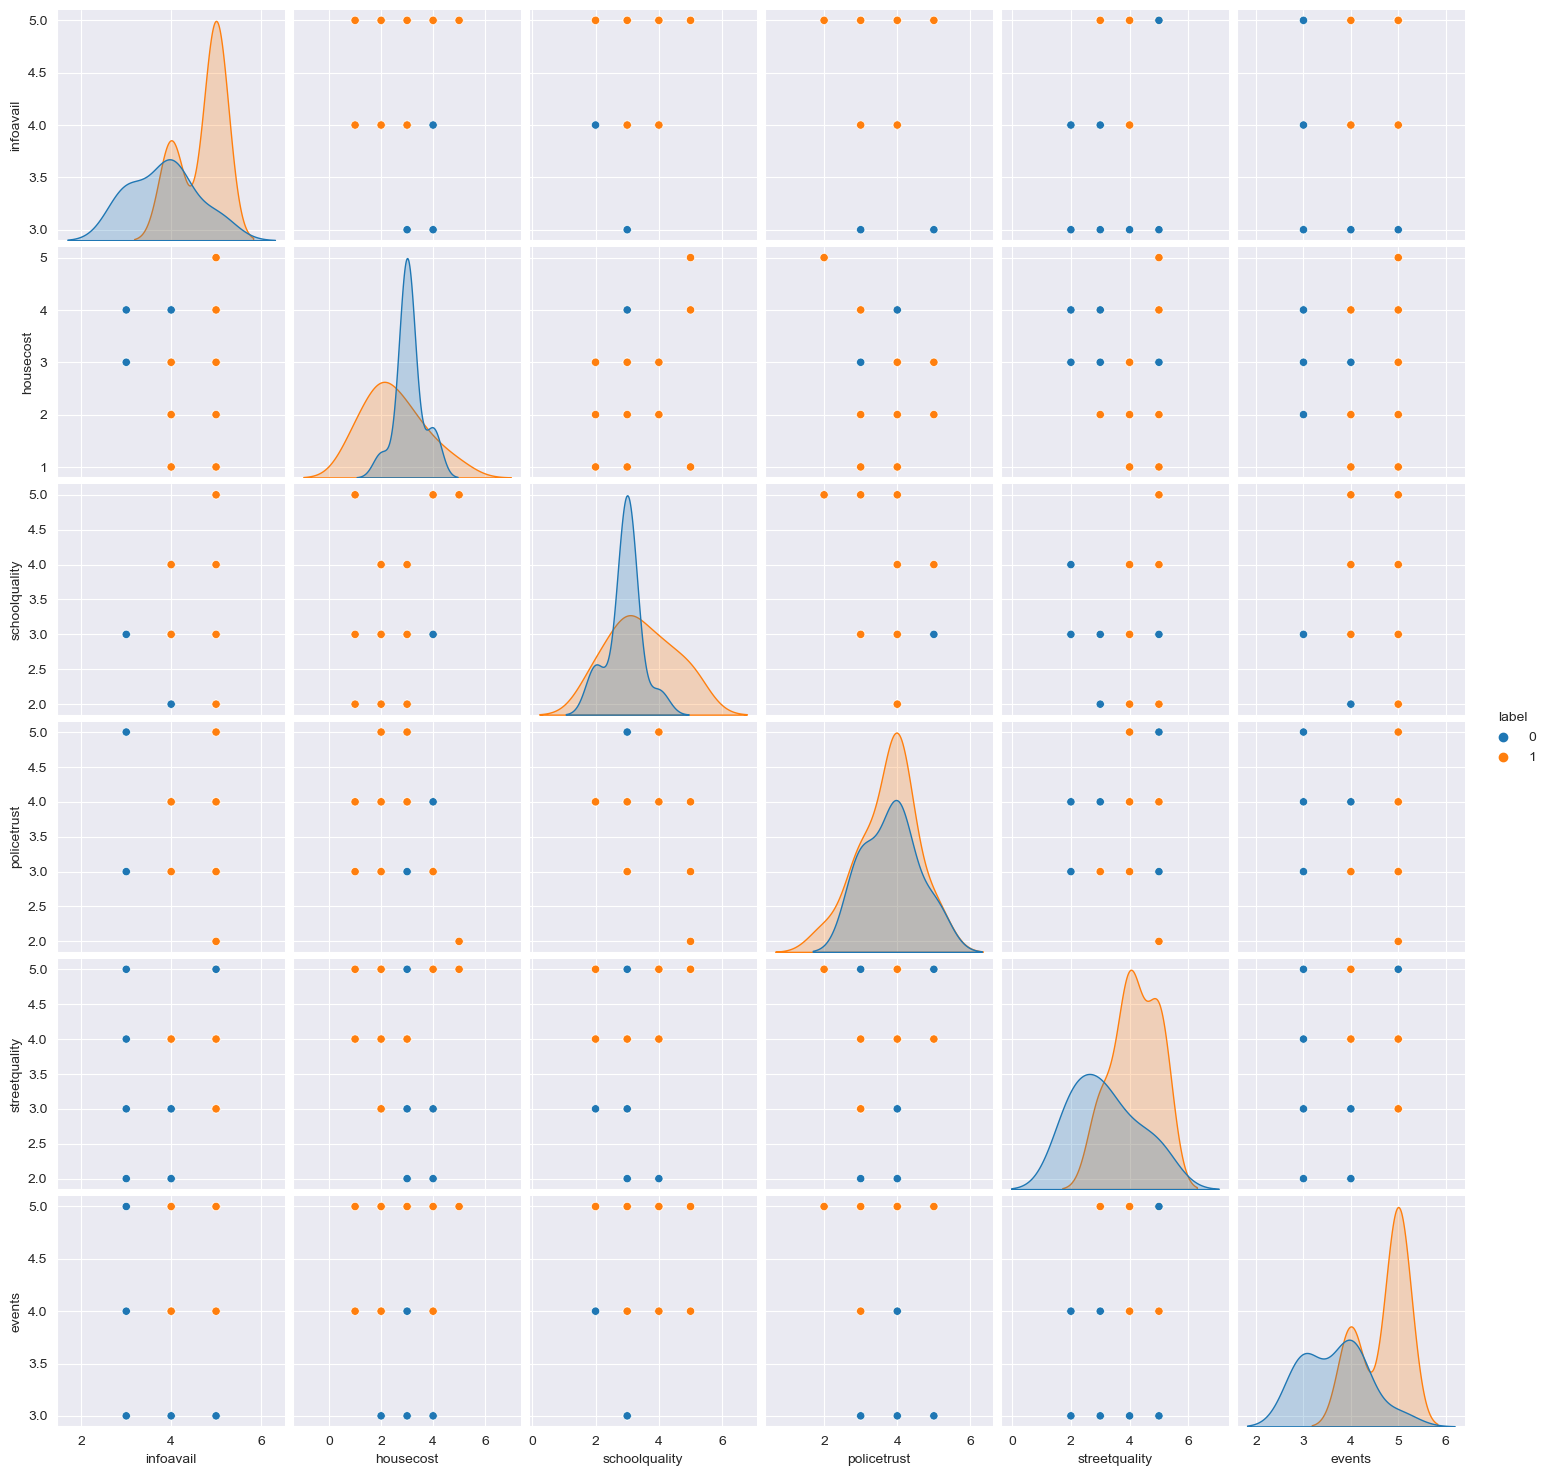

In [180]:
df_copy['label'] = y_pred_nb_m

sns.pairplot(df_copy, hue='label')

# SVM (SVC)

now we will use a classifier that usually gets the best results because it has different parameters

A support vector machine (SVM) is a type of supervised learning algorithm used in machine learning to solve classification and regression tasks, SVMs are particularly good at solving binary classification problems, which require classifying the elements of a data set into two groups.

In [181]:
from sklearn.svm import SVC

we start by using the Gridsearch to get the best parameters, in SVM or SVC this is the most important step because we have 3 types of SVm and a gamma and a C

In [182]:
svm = SVC()

In [183]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']}

In [184]:
grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)

in this cell we can see that the gridsearch tests every possible outcome to find which one is best

In [185]:
grid.fit(x_train_s, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.682 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.591 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

now we use the result from gridsearch to fit our model in hopes of getting the best results

In [186]:
svm = SVC(kernel='rbf',gamma=0.0001, C=1000)

using the original data we got the accuracy of 0.46

In [187]:
svm.fit(x_train_n, y_train)
y_pred_svm_n = svm.predict(x_test_n)
print('report for SVM with original data:\n', classification_report(y_test, y_pred_svm_n))

report for SVM with original data:
               precision    recall  f1-score   support

           0       0.57      0.25      0.35        16
           1       0.43      0.75      0.55        12

    accuracy                           0.46        28
   macro avg       0.50      0.50      0.45        28
weighted avg       0.51      0.46      0.43        28


using the standard scaled data we got the accuracy of 0.54

In [188]:
svm.fit(x_train_s, y_train)
y_pred_svm_s = svm.predict(x_test_s)
print('report for SVM with scaled data:\n', classification_report(y_test, y_pred_svm_s))

report for SVM with scaled data:
               precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.48      0.83      0.61        12

    accuracy                           0.54        28
   macro avg       0.60      0.57      0.52        28
weighted avg       0.61      0.54      0.51        28


and with the min max scaled data we got the accuracy of 0.54

In [189]:
svm.fit(x_train_m, y_train)
y_pred_svm_m = svm.predict(x_test_m)
print('report for SVM with min max data:\n', classification_report(y_test, y_pred_svm_m))

report for SVM with min max data:
               precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.45      0.75      0.56        12

    accuracy                           0.50        28
   macro avg       0.54      0.53      0.49        28
weighted avg       0.55      0.50      0.48        28


as you can see in SVM different preprocessings have different effects, here the best one was the standard scaled data with the accuracy 0.54

now we plot the result here

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


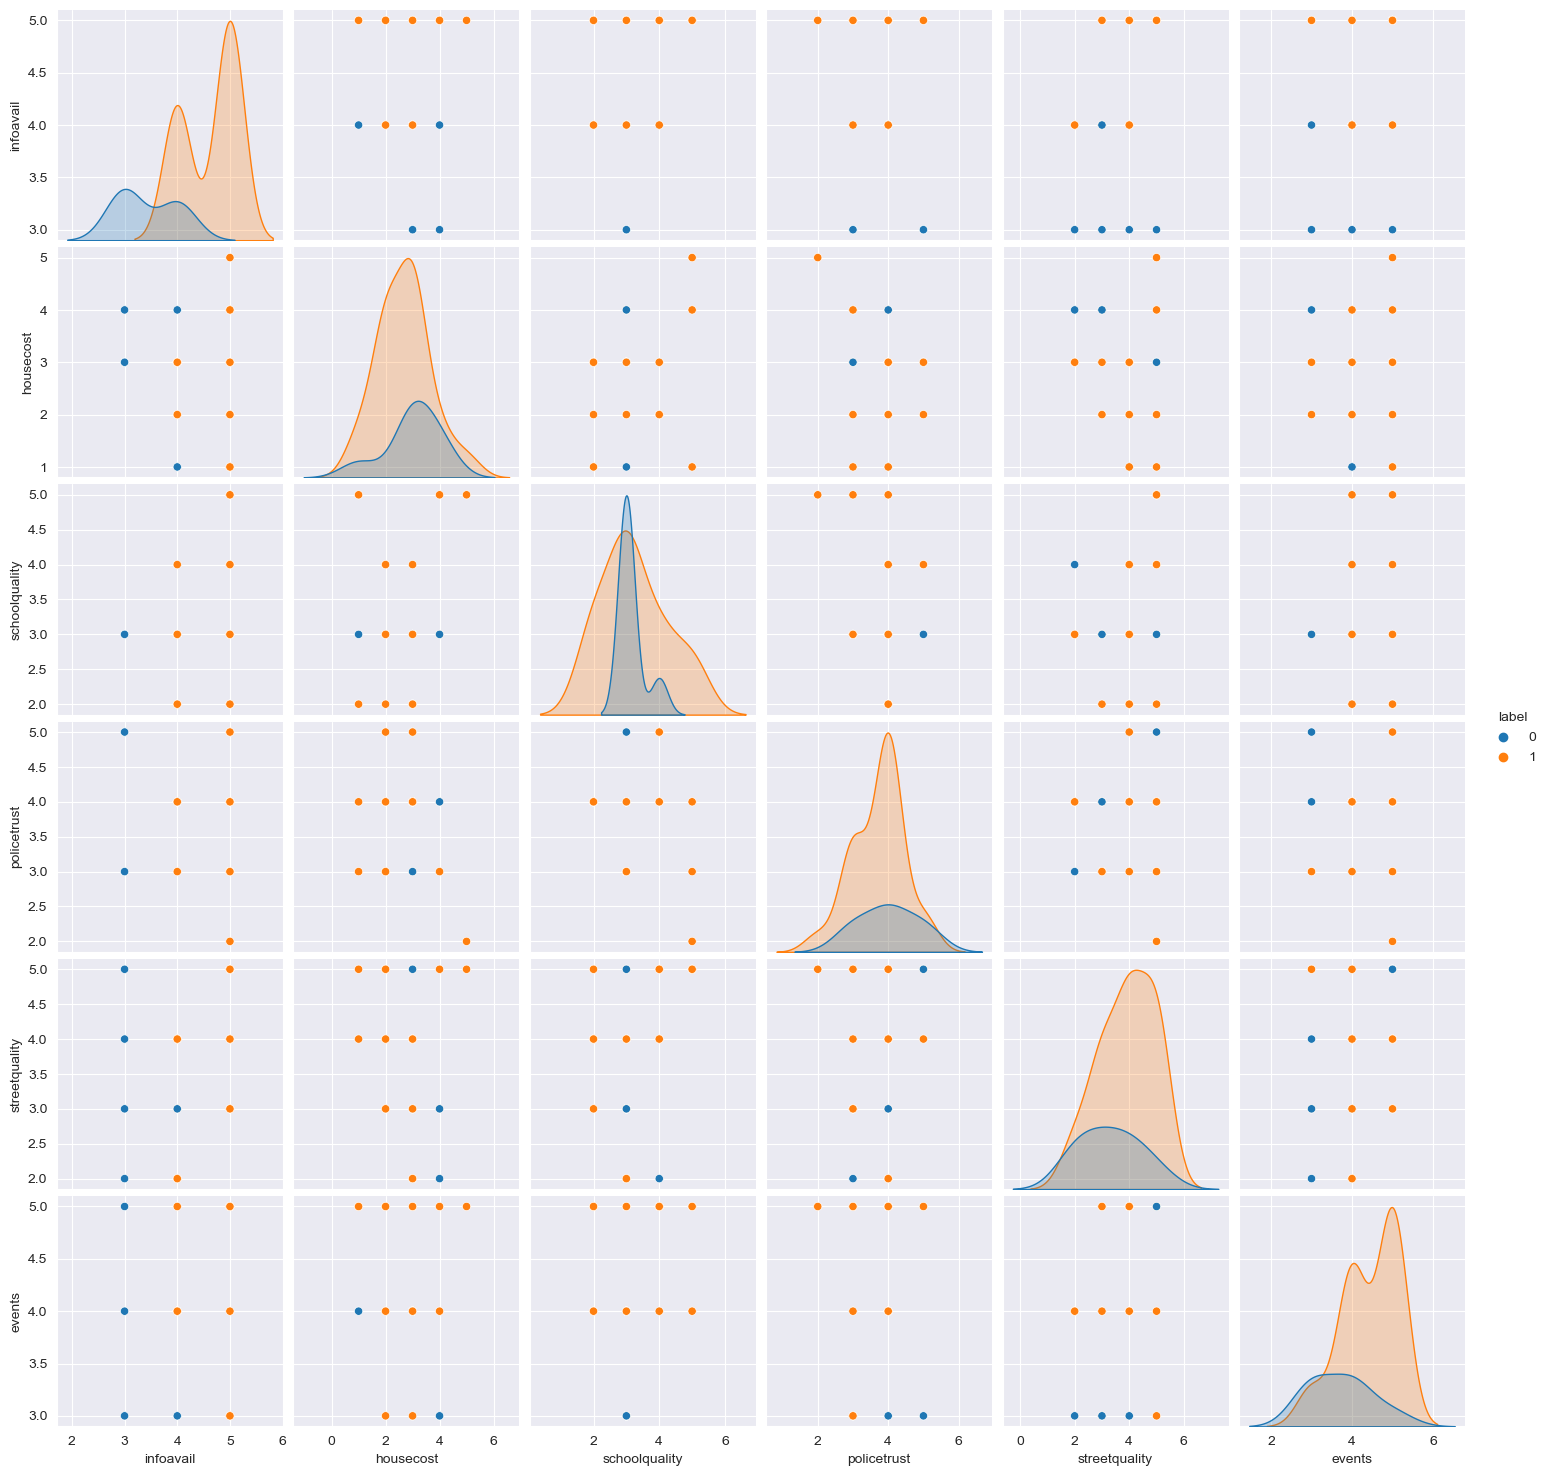

In [190]:
df_copy['label'] = y_pred_svm_s

sns.pairplot(df_copy, hue='label')

# LogisticRegression

now we use another classifier called Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

we first import it from sklearn linear model

In [191]:
from sklearn.linear_model import LogisticRegression

now we use the Gridsearch to find the best parameter for C

In [192]:
logreg = LogisticRegression()

In [193]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [194]:
grid = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')

In [195]:
grid.fit(x_train_s, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1}
LogisticRegression(C=0.1)


now that we have the best parameter we start using it on our data

In [196]:
logreg = LogisticRegression(C=0.1)

at first we start by training on our original data to get accuracy of 0.43

In [197]:
logreg.fit(x_train_n, y_train)
y_pred_log_n = svm.predict(x_test_n)
print('report for Logistic Regression with normal data:\n', classification_report(y_test, y_pred_log_n))

report for Logistic Regression with normal data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.43      1.00      0.60        12

    accuracy                           0.43        28
   macro avg       0.21      0.50      0.30        28
weighted avg       0.18      0.43      0.26        28


E:\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

with the standard scaled data we got the accuracy of 0.61 which is the best one we got until now

In [198]:
logreg.fit(x_train_s, y_train)
y_pred_log_s = svm.predict(x_test_s)
print('report for Logistic Regression with scaled data:\n', classification_report(y_test, y_pred_log_s))

report for Logistic Regression with scaled data:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.55      0.50      0.52        12

    accuracy                           0.61        28
   macro avg       0.60      0.59      0.59        28
weighted avg       0.60      0.61      0.60        28


now we use the min max data to get the accuracy of 0.50

In [199]:
logreg.fit(x_train_m, y_train)
y_pred_log_m = svm.predict(x_test_m)
print('report for Logistic Regression with normal data:\n', classification_report(y_test, y_pred_log_m))

report for Logistic Regression with normal data:
               precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.45      0.75      0.56        12

    accuracy                           0.50        28
   macro avg       0.54      0.53      0.49        28
weighted avg       0.55      0.50      0.48        28


as we can see, this method can work the best with datasets like ours, we got the acccuracy of 0.61 with standard scaled data

now we plot this result down here

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


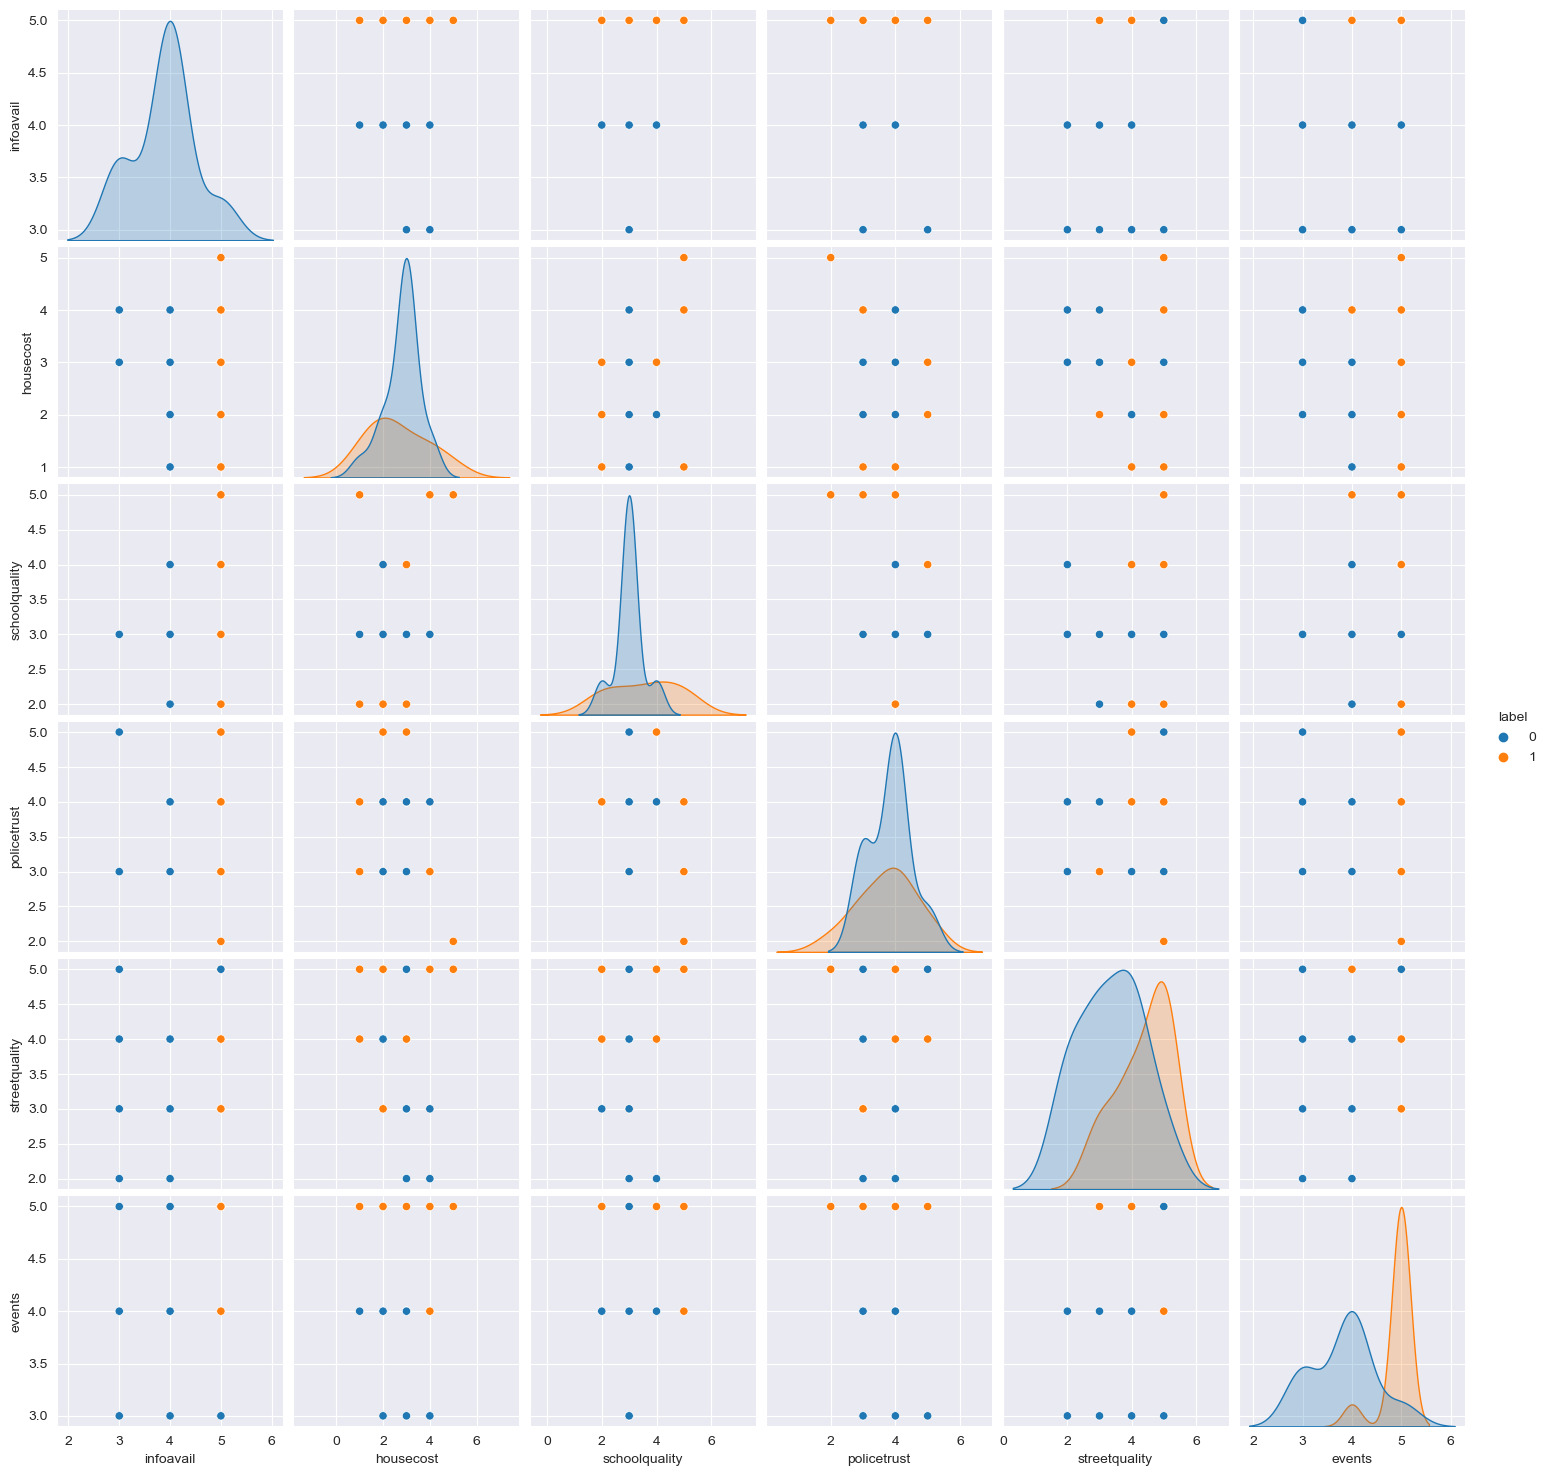

In [200]:
df_copy['label'] = y_pred_log_s

sns.pairplot(df_copy, hue='label')

# Random Forest Classifier

now we use another method called Random Forest Classifier

Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

first we import it from sklearn ensemble

In [201]:
from sklearn.ensemble import RandomForestClassifier

we use gridsearch to find the best parameters

In [202]:
rf = RandomForestClassifier()

In [203]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [204]:
grid = GridSearchCV(rf, param_grid, cv=5)

In [205]:
grid.fit(x_train_s, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
RandomForestClassifier(max_depth=5, n_estimators=200)


E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "E:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

now that we have the best parameters we start using them

In [206]:
rf = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt', n_estimators=200)

at first we try it on our original data to get the accuracy of 0.43

In [207]:
rf.fit(x_train_n, y_train)
y_pred_rf_n = rf.predict(x_test_n)
print('report for Random Forest with normal data:\n', classification_report(y_test, y_pred_rf_n))

report for Random Forest with normal data:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.44      0.67      0.53        12

    accuracy                           0.50        28
   macro avg       0.52      0.52      0.50        28
weighted avg       0.53      0.50      0.49        28


with the standard scaled data we get the accuracy of 0.5

In [208]:
rf.fit(x_train_s, y_train)
y_pred_rf_s = rf.predict(x_test_s)
print('report for Random Forest with scaled data:\n', classification_report(y_test, y_pred_rf_s))

report for Random Forest with scaled data:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.44      0.67      0.53        12

    accuracy                           0.50        28
   macro avg       0.52      0.52      0.50        28
weighted avg       0.53      0.50      0.49        28


and with the min max scaled data we get 0.46 for accuracy

In [209]:
rf.fit(x_train_m, y_train)
y_pred_rf_m = rf.predict(x_test_m)
print('report for Random Forest with min max data:\n', classification_report(y_test, y_pred_rf_m))

report for Random Forest with min max data:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.39      0.58      0.47        12

    accuracy                           0.43        28
   macro avg       0.44      0.45      0.43        28
weighted avg       0.45      0.43      0.42        28


here again the standard scaled data did the best

we plot it down here

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


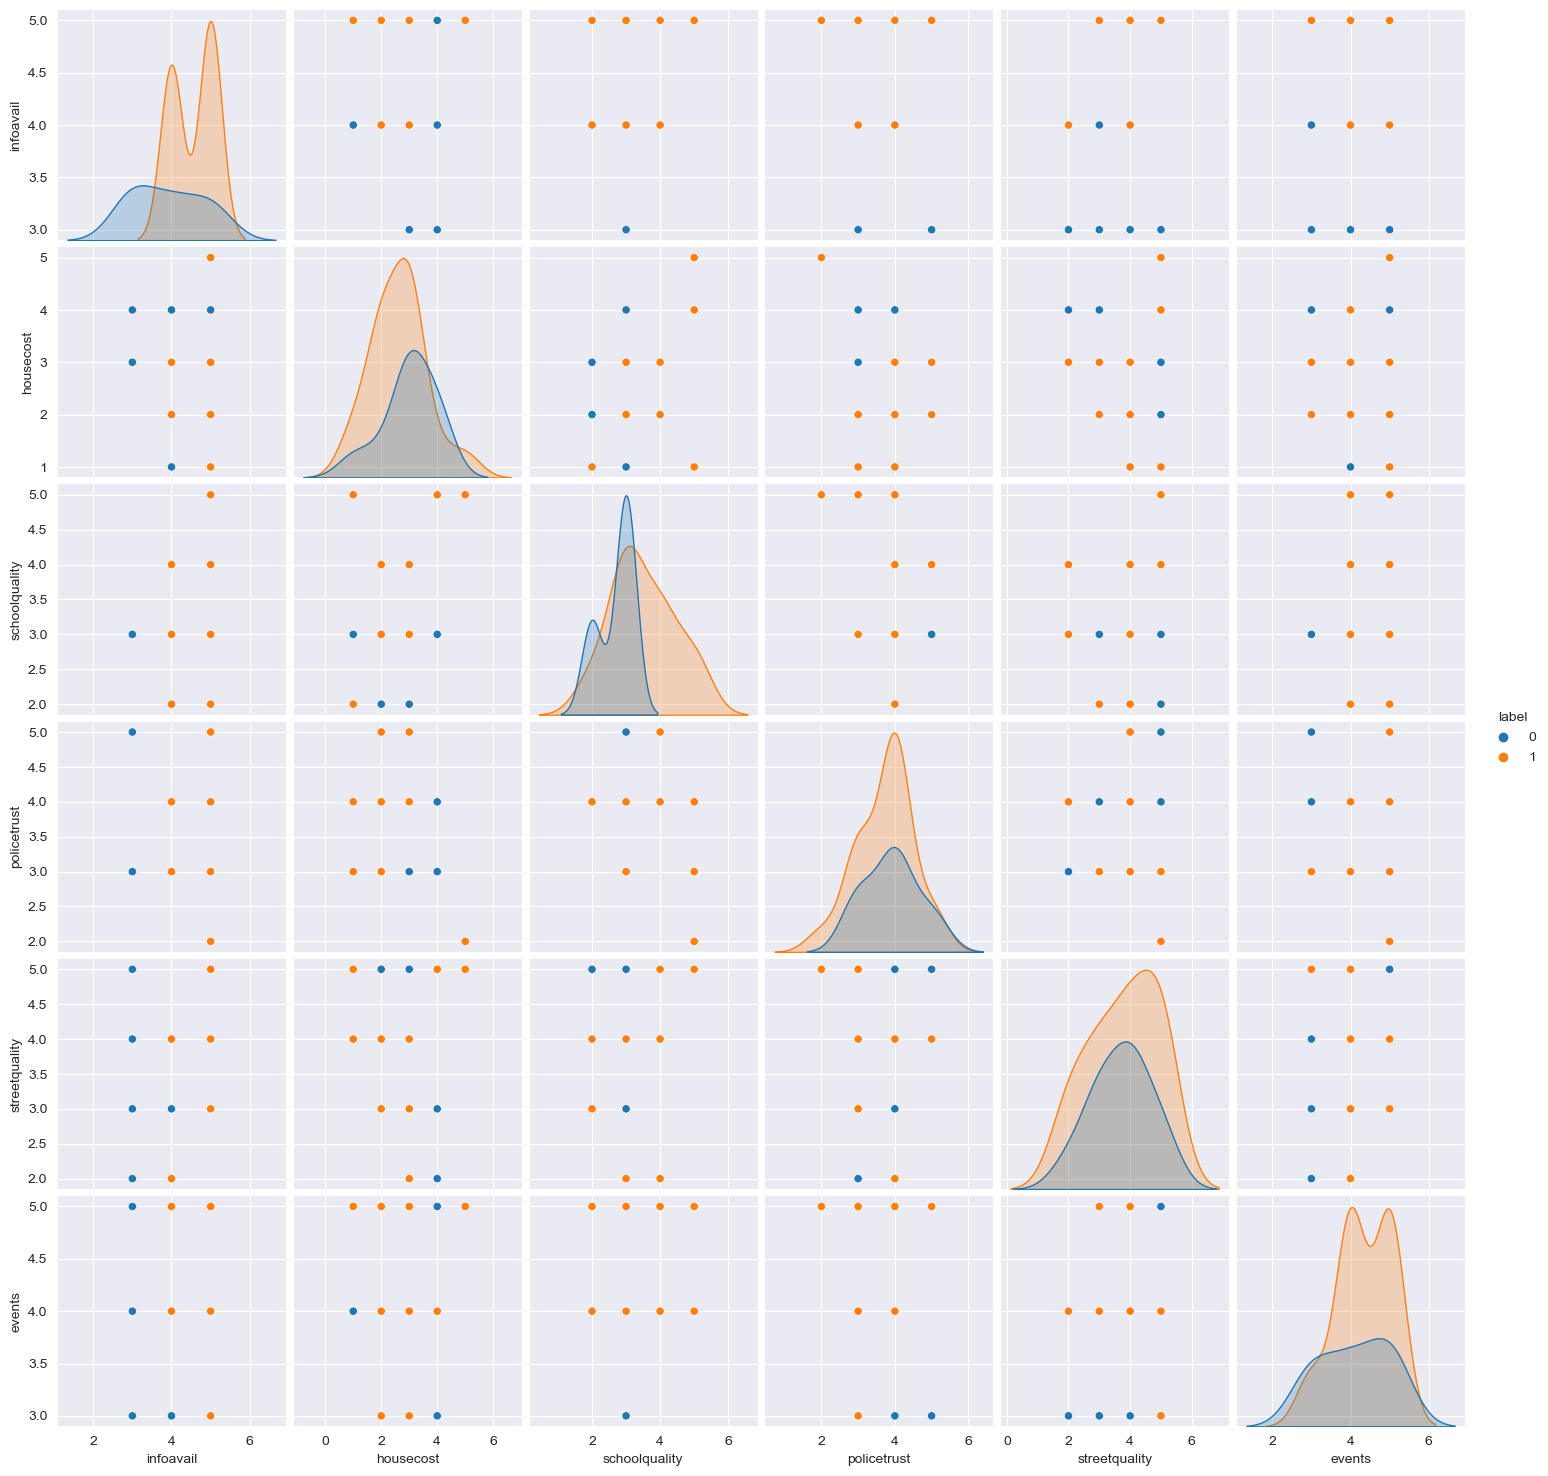

In [210]:
df_copy['label'] = y_pred_rf_m

sns.pairplot(df_copy, hue='label')

# MLP Classifier

now we use another classifier called mlp that is related to neural networks

In the vast field of machine learning, there are numerous algorithms and techniques available to solve classification problems. One such powerful algorithm is the Multilayer Perceptron (MLP) classifier. MLP is a type of artificial neural network that has proven to be effective in handling complex classification tasks.

first we import it from sklearn neural network

In [211]:
from sklearn.neural_network import MLPClassifier

at first we use gridsearch to find thhe best parameters

In [212]:
mlp = MLPClassifier(max_iter=100)

In [213]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [214]:
grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)

In [215]:
grid.fit(x_train_s, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
MLPClassifier(activation='tanh', max_iter=100)


E:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


now that we have them we use them to train our data

In [216]:
mlp = MLPClassifier(max_iter=1000, activation='tanh', alpha=0.0001,
                    hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
                    solver='sgd')

at first we use it on our original data to get accuracy of 0.46

In [217]:
mlp.fit(x_train_n, y_train)
y_pred_mlp_n = mlp.predict(x_test_n)
print('report for MLP classifier with original data:\n', classification_report(y_test, y_pred_mlp_n))

report for MLP classifier with original data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.43      1.00      0.60        12

    accuracy                           0.43        28
   macro avg       0.21      0.50      0.30        28
weighted avg       0.18      0.43      0.26        28


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


then we use it on our standard scaled data to get the accuracy of 0.43

In [218]:
mlp.fit(x_train_s, y_train)
y_pred_mlp_s = mlp.predict(x_test_s)
print('report for MLP classifier with scaled data:\n', classification_report(y_test, y_pred_mlp_s))

report for MLP classifier with scaled data:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.38      0.50      0.43        12

    accuracy                           0.43        28
   macro avg       0.44      0.44      0.43        28
weighted avg       0.45      0.43      0.43        28


and for the first time we minmax scaled data did the best of all three to get the accuracy of 0.54

In [219]:
mlp.fit(x_train_m, y_train)
y_pred_mlp_m = mlp.predict(x_test_m)
print('report for MLP classifier with min max data:\n', classification_report(y_test, y_pred_mlp_m))

report for MLP classifier with min max data:
               precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.46      0.92      0.61        12

    accuracy                           0.50        28
   macro avg       0.60      0.55      0.46        28
weighted avg       0.62      0.50      0.43        28


as you can see this method wasnt the best for our dataset but we realized min max scaling can have good effects here

now we plot the results down here

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


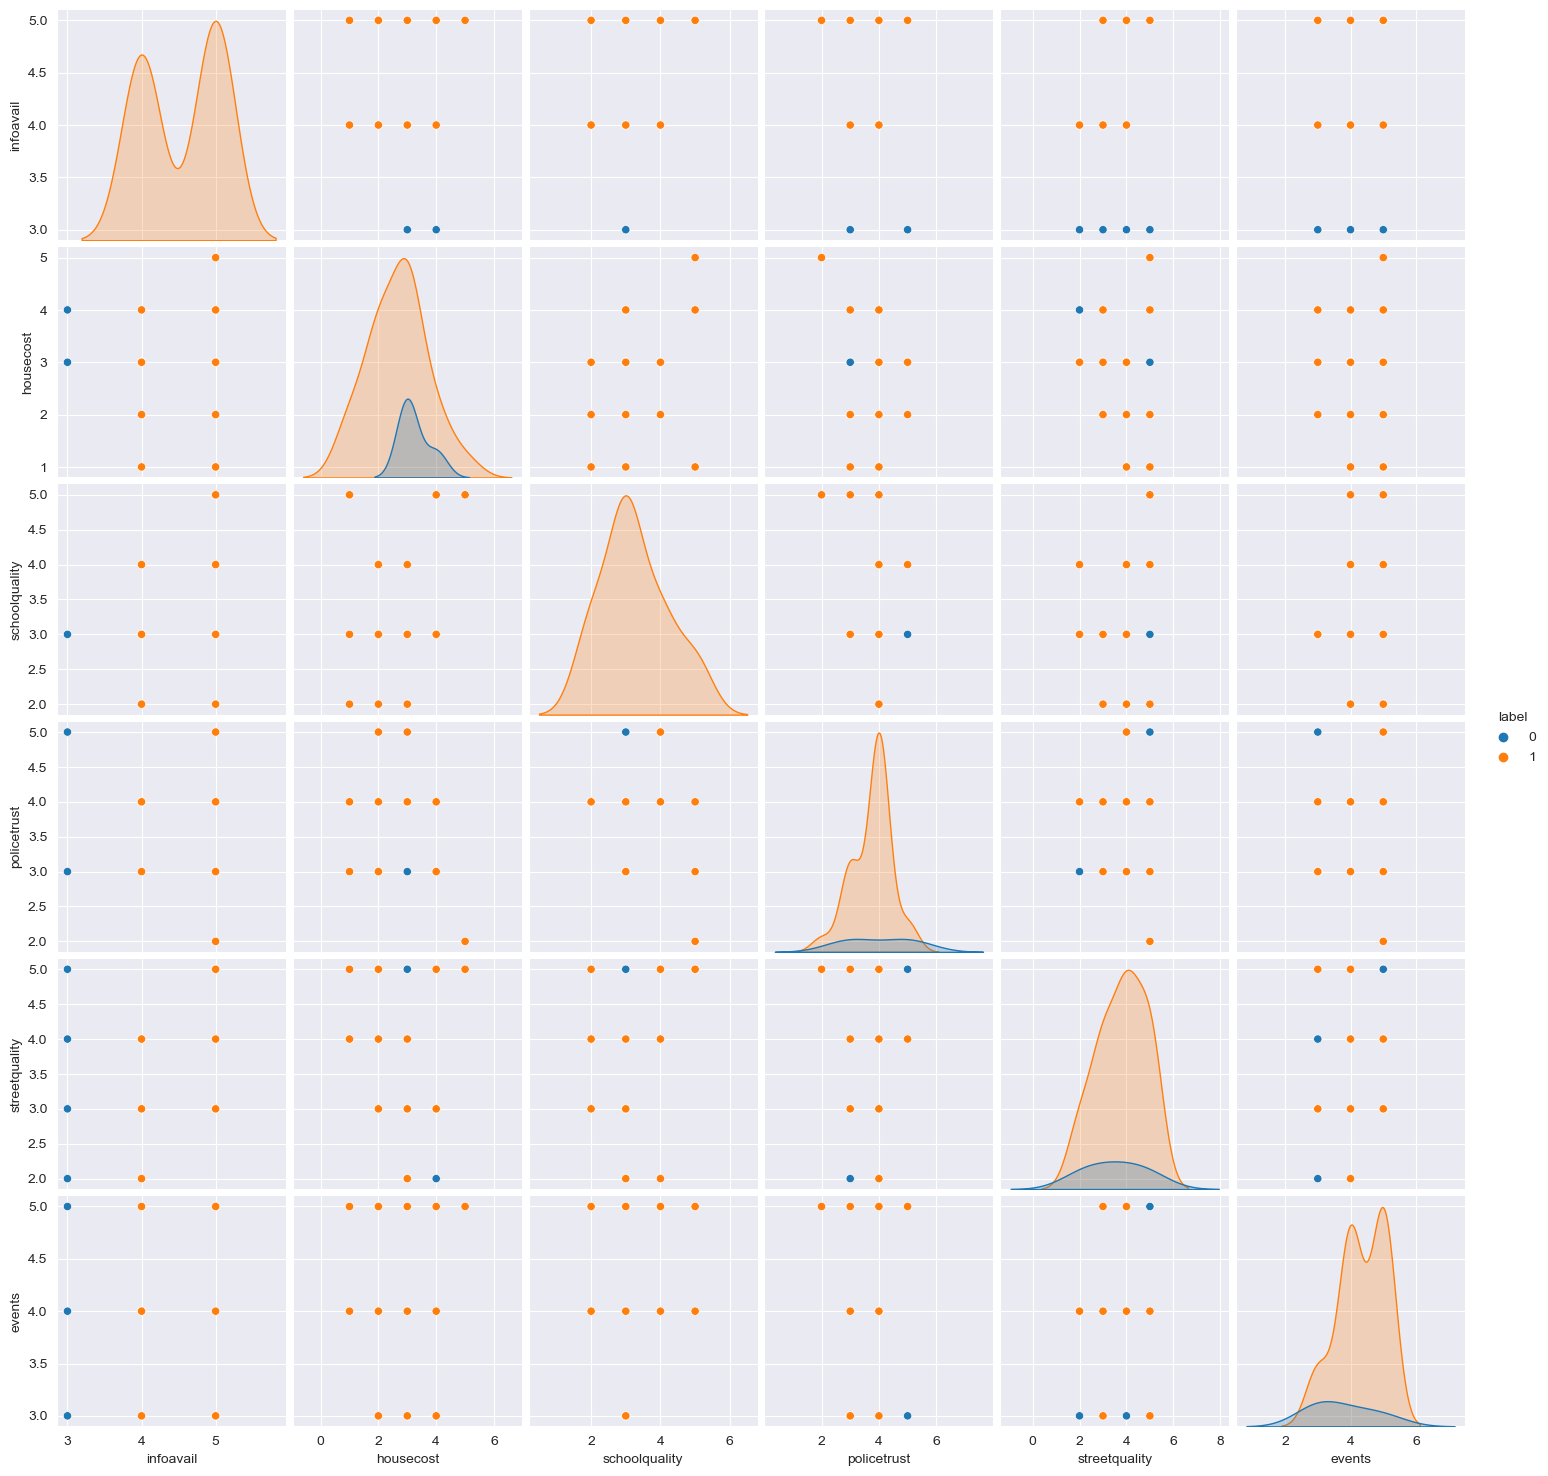

In [220]:
df_copy['label'] = y_pred_mlp_m

sns.pairplot(df_copy, hue='label')

# RESULT

i have put all the results in a csv file to be abel to better see

In [221]:
res = pd.read_csv('ClfResult.csv')
res

,Unnamed: 0,knn,dt,nb,svm,logreg,rf,mlp,best score
0,original,0.57,0.39,0.57,0.46,0.43,0.5,0.43,0.57
1,standardscale,0.5,0.39,0.57,0.54,0.61,0.5,0.43,0.61
2,minmaxscale,0.46,0.39,0.57,0.5,0.5,0.43,0.5,0.57
3,best pre,org,all,all,standard,standard,org and standard,min max,NaN


as we can see the best result we got here is logistic regression and standard scaler(normalized) for preprocessing,gridsearch helped us achieve the accuracy of 0.61 by showing us we should make C=0.1